## Titanic: Estudo de Caso Voltado à Dados

**Nome:** Thiago Henrique Gomes Panini

**Curso:** Nanodegree: Fundamentos de Data Science I

O naufrágio do navio Titanic foi um dos mais marcantes acontecimentos da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou depois de colidir com um iceberg, somando 1.502 vítimas entre passageiros e tripulantes. Esta tragédia chocou a comunidade internacional e levou a melhores normas de segurança para os navios.

O objetivo deste projeto é avaliar, analisar, entender, estudar, preparar e aplicar um conjunto de estatísticas descritivas para retirada de conclusões em uma base de dados que transcreve características de passageiros e tripulantes do Titanic afim de verificar, em primeira instância, quais os fatores que influenciaram diretamente na probabilidade de sobrevivência dos presentes na viagem.

Utilizando a linguagem Python e as ferramentas do pacote Anaconda, espera-se:

* Aplicar todos os passos envolvidos em um processo de análise de dados típico;
* Realizar perguntas que podem ser respondidas por um conjunto de dados e, em seguida, respondê-las;
* Investigar problemas em um conjunto de dados;
* Adquirir prática em comunicar os resultados da análise;
* Utilizar operações vetorizadas no NumPy e Pandas para aprimorar o código;
* Trabalhar com Series e DataFrame do Pandas, que permitem acessar os dados de forma mais conveniente;
* Utilizar o Matplotlib para produzir gráficos mostrando as descobertas e os resultados obtidos.

Para a conclusão do curso Fundamentos de Data Science I, foi proposto um projeto final envolvendo a análise de uma base contendo dados de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic. Com essas informações, deve-se realizar questionamentos prévios para serem respondidos utilizando as ferramentas do Python acima mencionadas.


### Entendendo e Avaliando os Dados

O Dataset disponibilizado possui os seguintes:

* _PassengerId_ - Coluna criada pelo Kaggle para identificação dos registros;
* _Survived_ - Indica se a pessoa sobreviveu ou não ao acidente (0=Não, 1=Sim);
* _Pclass_ - A classe referente ao ticket comprado pelo passageiro;
* _Sex_ - Gênero do passageiro;
* _Age_ - Idade do passageiro;
* _SibSp_ - Número de irmãos ou conjûges a bordo com o passageiro;
* _Parch_ - Número de pais ou crianças a bordo com o passageiro;
* _Ticket_ - Número do ticket do passageiro;
* _Fare_ - Tarifa paga pelo passageiro;
* _Cabin_ - Número da cabine do passageiro;
* _Embarked_ - Porto no qual o passageiro embarcou (C=Cherbourg, Q=Queenstown, S=Southampton).

In [94]:
# Importando biblioteca Pandas e lendo arquivo
import pandas as pd

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/titanic-data-6.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
# Verificando dimensões
print(f'O DataFrame Titanic possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O DataFrame Titanic possui 891 linhas e 12 colunas.


In [96]:
# Verificando tipos primitivos
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

De acordo com o significado de cada uma das colunas do Dataset, não será necessária nenhuma transformação nos tipos de dados.

In [97]:
# Verificando dados missing
df.isnull().values.any()

True

In [98]:
# Comunicando
print(f'Há dados faltantes neste Dataset?\nR: {df.isnull().values.any()}')

Há dados faltantes neste Dataset?
R: True


In [99]:
# Dados nulos 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**1)** É notório que a coluna *Cabin* possui a situação mais crítica: 687 dos 891 dados estão faltando. Porém, trata-se de uma coluna que, a princípio, não possui relevância para a análise de dados proposta, fato este que leva a manutenção desta coluna e a não exclusão de seus registros faltantes.

**2)** Coluna Age também apresenta problemas. São 177 dados faltantes que precisam ser tratados de alguma forma, visto que esta feature pode ser muito importante para análises futuras.

**3)** Embarked apresenta 2 valores faltantes. Investigar se há uma relação entre ambos e se é possível deduzir em qual porto estas duas instâncias embarcaram.

In [100]:
# Outra abordagem para dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [101]:
# Verificando dados duplicados
df.duplicated().any()

False

Não há dados duplicados, logo, não é necessário nenhum procedimento posterior para exclusão (ou não) dos registros.

In [102]:
# Valores únicos em cada coluna
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Preparando os Dados

In [103]:
# Visualizando algumas estatísticas de dados numéricos
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
# Visualizando novamente o head
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Percebe-se que a coluna **PassengerId** poderia muito bem se tornar o índice do DataFrame

In [105]:
# Transformando coluna PassengerId em índice
df.set_index('PassengerId', inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
# Verificando dados nulos
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [107]:
# Tratando dados da coluna Age
df['Age'].isnull().sum()

177

In [108]:
# Verificando a média de Idades
media = df['Age'].mean()
media

29.69911764705882

In [109]:
# Verificando Idade máxima
df['Age'].max()

80.0

In [110]:
# Verificando Idade mínima
df['Age'].min()

0.42

In [111]:
# Verificando mediana
df['Age'].median()

28.0

In [112]:
# Características do atributo Age
print(f'Média de idades: {df["Age"].mean():.1f} anos.')
print(f'Mediana de idades: {df["Age"].median():.2f} anos.')
print(f'Maior idade encontrada: {df["Age"].max()} anos.')
print(f'Menor idade encontrada: {df["Age"].min()} anos.')

Média de idades: 29.7 anos.
Mediana de idades: 28.00 anos.
Maior idade encontrada: 80.0 anos.
Menor idade encontrada: 0.42 anos.


In [113]:
# Estatísticas sobre atributo Idade
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [114]:
# Preenchendo dados com a média
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean, inplace=True)

# Verificando resultado
print(f'Há dados faltantes na coluna Age? {df["Age"].isnull().any()}')

Há dados faltantes na coluna Age? False


In [115]:
# Visão geral
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [116]:
# Verificando impacto da coluna Cabin
df['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
D              3
F2             3
F33            3
C22 C26        3
B22            2
E24            2
C2             2
B18            2
D36            2
C123           2
E121           2
B77            2
E33            2
B35            2
B5             2
D26            2
D33            2
B49            2
E8             2
C52            2
B20            2
B58 B60        2
B28            2
C125           2
D35            2
E25            2
              ..
E17            1
C87            1
E40            1
D50            1
B42            1
D19            1
D47            1
C7             1
D7             1
C101           1
C86            1
B80            1
D37            1
D46            1
C91            1
B30            1
B78            1
C95            1
C118           1
B3             1
C47            1
B71            1
C103           1
B94            1
D9             1
A19            1
D56            1
C104          

A coluna Cabin não apresenta nenhuma singularidade e, portanto, não provoca efeitos significativos na análise dos resultados. Dessa forma, optar por elimina-la é o caminho mais adequado, visando a simplicidade e objetividade do projeto.

In [117]:
# Visualizando detalhes sobre dados faltantes em Embarked
df[df['Embarked'].isnull()].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [118]:
# Dedução pelo Ticket?
print(f"Pessoas com o ticket 113572: {(df['Ticket'] == '113572').sum()}")
print(f"Pessoas na cabine B28: {(df['Cabin'] == 'B28').sum()}")

Pessoas com o ticket 113572: 2
Pessoas na cabine B28: 2


In [119]:
# Pessoas que pagaram 80 no ticket
f_80 = df.query('Fare == 80')['Name']
f_80

PassengerId
62                           Icard, Miss. Amelie
830    Stone, Mrs. George Nelson (Martha Evelyn)
Name: Name, dtype: object

In [120]:
near_fare

Embarked
C    36
Q     2
S    71
Name: Name, dtype: int64

In [121]:
# Dedução pelo atributo Fare? Proporção de pessoas que pagaram 80 +/- 30
limit_above = 30
limit_below = 30
target = 80
near_fare = df.query('Fare < @target+@limit_above & Fare > @target-@limit_below')
near_fare = near_fare.groupby('Embarked').count()['Name']
emb_totals = df.groupby('Embarked').count()['Name']
proportions = 100 * near_fare / totals

for state in near_fare.index:
    if state == 'C':
        estado = 'Cherbourg'
    elif state == 'Q':
        estado = 'Queenstown'
    else:
        estado = 'Southampton'
    print(f"Embarcaram em {estado} e pagaram entre 50.00 e 110.00: {proportions[state]:.2f}%")

Embarcaram em Cherbourg e pagaram entre 50.00 e 110.00: 21.43%
Embarcaram em Queenstown e pagaram entre 50.00 e 110.00: 2.60%
Embarcaram em Southampton e pagaram entre 50.00 e 110.00: 11.02%


In [122]:
# Proporção de Classe 1 por porto de embarque 

class_embarked = df.groupby(['Pclass', 'Embarked']).count()['Name']
states_index = df['Embarked'].value_counts().index
prop_class = 100 * class_embarked / emb_totals

for state in states_index:
    if state == 'C':
        estado = 'Cherbourg'
    elif state == 'Q':
        estado = 'Queenstown'
    else:
        estado = 'Southampton'
    print(f'Embarcaram em {estado} e pertencem à Classe 1: {prop_class[1][state]:.2f}%')

Embarcaram em Southampton e pertencem à Classe 1: 19.72%
Embarcaram em Cherbourg e pertencem à Classe 1: 50.60%
Embarcaram em Queenstown e pertencem à Classe 1: 2.60%


Após as análises, é possível supor que as duas passageiras com valor faltante na coluna 'Embarked' possivelmente embarcaram em Southampton pois:

* A maioria dos passageiros da Classe 1 embarcaram em Cherbourg
* Grande parte dos passageiros que pagaram um valor semelhante no ticket, embarcaram em Cherbourg
* Por exclusão, Queenstown ficou fora de cogitação por possuir poucos dados que satisfaziam os critérios

In [123]:
# Preenchendo dados faltantes em Embarked
print(f'Dados faltantes antes da inserção: {df["Embarked"].isnull().sum()}')
df['Embarked'].fillna('C', inplace=True)
print(f'Dados faltantes após a inserção: {df["Embarked"].isnull().sum()}')

Dados faltantes antes da inserção: 2
Dados faltantes após a inserção: 0


In [124]:
# Verificando alterações
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [125]:
# Excluindo coluna Cabin
df.drop('Cabin', axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [126]:
# Salvando novo Dataset
df.to_csv('C:/Users/thiagoPanini/Downloads/datasets/titanic-data-6-edited.csv')

### Exploração Gráfica

Em um processo de análise de dados, é muito comum atribuir conclusões e retiradas de insights através de visualizações e paineis gráficos. Se confecionadas de maneira adequada, tais visões são capazes de mostrar, de forma clara e precisa, a situação real dos dados, seja através de comparações, distribuições, correlações, ou qualquer outro parâmetro.

In [129]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/titanic-data-6-edited.csv', index_col='PassengerId')
#df.set_index('PassengerId', inplace=True)
sns.set()

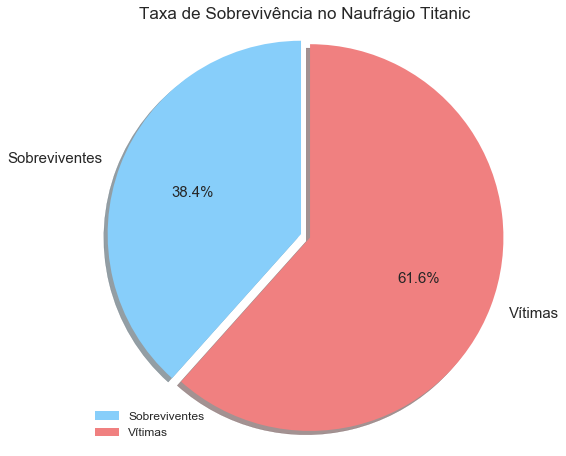

In [131]:
# Número de sobreviventes e vítimas
tx_surv = df.groupby('Survived').count()['Sex'][1]
tx_vict = df.groupby('Survived').count()['Sex'][0]

# Taxa de Sobreviventes
labels = ['Sobreviventes', 'Vítimas']
sizes = [tx_surv, tx_vict]
explode = (0.05, 0)
colors = ['lightskyblue', 'lightcoral']
fig, ax = plt.subplots(figsize=(6.5, 6.5))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, 
                                   startangle=90, shadow=True, explode=explode, 
                                  autopct='%1.1f%%', colors=colors)
ax.set_title('Taxa de Sobrevivência no Naufrágio Titanic', fontsize=17)
ax.axis('equal')
plt.legend(fontsize=12, loc='lower left')
plt.tight_layout()
plt.setp(autotexts, size=15)
plt.setp(texts, size=15)
plt.show()

A partir do gráfico acima, é possível identificar que, dos 891 passageiros e tripulantes, 38.4% sobreviveram e 61.6% foram vítimas. Tais números estão relativamente próximos dos índices históricos propostos pelos 2.224 presentes no navio que, por sua vez, apresentam taxas de 32% de sobreviventes e 68% de vítimas. Em outras palavras, pode-se dizer que os registros presentes neste Dataset estão coerentes com a realidade.

#### Sobreviventes por Gênero

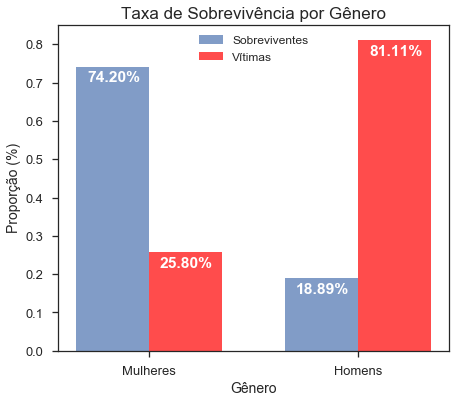

In [132]:
# Totalização por gênero
total_gender = df.groupby('Sex').count()['Name']

# Taxas de sobrevivência por gênero
gender_rate = df.groupby(['Sex', 'Survived']).count()['Name']
proportions = gender_rate / total_gender
prop_f = proportions['female']
prop_m = proportions['male']

# Proporção de sobreviventes e vítimas
survivors = [prop_f[1], prop_m[1]]
victims = [prop_f[0], prop_m[0]]

# Preparando plotagem e definindo design gráfico
ind = np.arange(len(survivors))
width = .35
sns.set_style('ticks')
sns.set_context('talk')

# Criando figs e axes
fig, ax = plt.subplots(figsize=(7, 6))
m_bar = plt.bar(ind, survivors, width, alpha=.7, label='Sobreviventes')
f_bar = plt.bar(ind+width, victims, width, color='r', alpha=.7, label='Vítimas')
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Proporção (%)', fontsize=14)
plt.title('Taxa de Sobrevivência por Gênero', fontsize=17)
locations = ind + width / 2
labels = ['Mulheres', 'Homens']
plt.xticks(locations, labels, fontsize=13)
plt.legend(fontsize=12)

# Mostrando porcentagem dos dados
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (p.get_x()+.15*width, p.get_y() + height - 0.04), 
                color='w', weight='bold')
plt.show()

O gráfico acima indica que, da totalidade de instâncias do gênero feminino, 74,20% mulheres sobreviveram e 25,80% foram vítimas. Analogamente, considerando a quantidade total de homens, apenas 18,89% sobreviveram e 81,11\% foram vítimas. Apesar de indicar que a probabilidade de uma mulher ter sobrevivido ao naufrágio foi maior, é importante ressaltar que a análise acima foi baseada na quantidade total por gênero, o que pode deturpar o julgamento, visto que a quantidade de mulheres presentes no navio era relativamente menor que a quantidade de homens.

Também é possível visualizar a proporção de sobreviventes e vítimas, levando em consideração os gêneros.

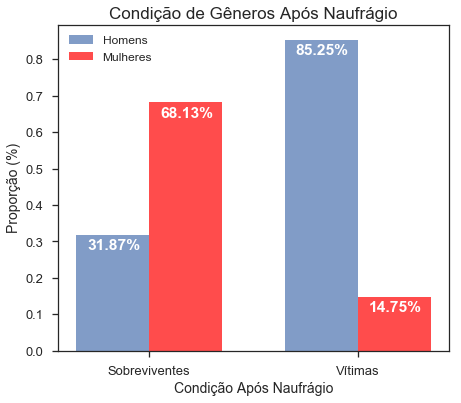

In [133]:
# Totalização por gênero
total_surv = df.groupby('Survived').count()['Name']

# Taxas de sobrevivência por gênero
gender_rate = df.groupby(['Sex', 'Survived']).count()['Name']
proportions = gender_rate / total_surv
prop_f = proportions['female']
prop_m = proportions['male']

# Proporção de sobreviventes e vítimas
survivors = [prop_f[1], prop_f[0]]
victims = [prop_m[1], prop_m[0]]

# Preparando plotagem
ind = np.arange(len(survivors))
width = .35
sns.set_style('ticks')
sns.set_context('talk')

# Criando figs e axes
fig, ax = plt.subplots(figsize=(7, 6))
m_bar = plt.bar(ind, victims, width, alpha=.7, label='Homens')
f_bar = plt.bar(ind+width, survivors, width, color='r', alpha=.7, label='Mulheres')
plt.xlabel('Condição Após Naufrágio', fontsize=14)
plt.ylabel('Proporção (%)', fontsize=14)
plt.title('Condição de Gêneros Após Naufrágio', fontsize=17)
locations = ind + width / 2
labels = ['Sobreviventes', 'Vítimas']
plt.xticks(locations, labels, fontsize=13)
plt.legend(fontsize=12)

# Mostrando legenda dos dados
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (p.get_x()+.15*width, p.get_y() + height - 0.04), 
                color='w', weight='bold')
plt.show()

Assim, é possível dizer que, da quantidade total de sobreviventes, 68,13% eram mulheres e 31,87% eram homens. De modo equivalente, da totalidade de vítimas, 85,25% eram do gênero masculino e apenas 14,75% do gênero feminino. A probabilidade de uma mulher ter sobrevivido ao naufrágio é bem maior que a de um homem. Alguns argumentos que possivelmente explicariam este resultado:

* Aplicação da regra "Mulheres e crianças primeiro";
* Maior quantidade de homens presentes;
* Peso máximo em botes salva-vidas;

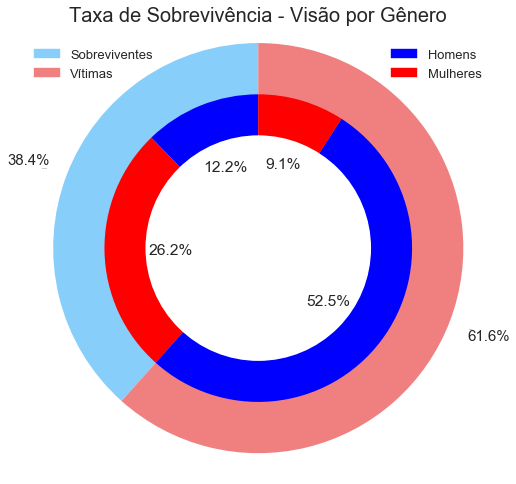

In [134]:
# Plotagem final da taxa de sobreviventes contendo informações de gênero

import matplotlib.patches as mpatches

# Número de sobreviventes e vítimas
total_surv = df.groupby('Survived').count()['Name']
surv_gender = df.groupby(['Sex', 'Survived']).count()['Name']
prop_surv_f = surv_gender['female'] 
prop_surv_m = surv_gender['male'] 

# Preparando dados para plotagem
labels = ['Sobreviventes', 'Vítimas']
sizes = [total_surv[1], total_surv[0]]
labels_gender = ['Masculino', 'Feminino'] * 2
sizes_gender = [prop_surv_m[1], prop_surv_f[1], prop_surv_m[0], prop_surv_f[0]]
colors = ['lightskyblue', 'lightcoral']
colors_gender = ['blue', 'red']
explode = (0.05, 0)
explode_gender = (0.05, 0, 0.05, 0)

# Criando figz e axes
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, startangle=90,
                                   frame=True, autopct='%1.1f%%', pctdistance=1.20)
wedges_g, texts_g, autotexts_g = plt.pie(sizes_gender, colors=colors_gender, radius=0.75, 
                  autopct='%1.1f%%', pctdistance=0.57, startangle=90)
center_circle = plt.Circle((0,0), 0.55, fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(center_circle)
ax.set_title('Taxa de Sobrevivência - Visão por Gênero', fontsize=20)
ax.axis('equal')
plt.legend(fontsize=12, loc='upper left')

# Criando legenda manualmente
legend_f = mpatches.Patch(color='red', label='Mulheres')
legend_m = mpatches.Patch(color='blue', label='Homens')
legend_s = mpatches.Patch(color='lightskyblue', label='Sobreviventes')
legend_v = mpatches.Patch(color='lightcoral', label='Vítimas')
plt.legend(bbox_to_anchor=(0., 0.87, 1., .102), loc=3, 
           ncol=2, mode="expand", borderaxespad=0., handles=[legend_s, legend_v, legend_m, legend_f])
plt.tight_layout()
plt.setp(autotexts, size=15)
plt.setp(texts, size=0)
plt.show()

Desse modo, é possível perceber que a fatia interna vermelha, referente ao gênero feminino representa a maior parcela da fatia externa de sobreviventes. Em outras palavras, é válido dizer que 26,2% de todos os passageiros e tripulantes podem ser classificados como sobreviventes do gênero feminino. Analogamente, é possível concluir, através da análise da fatia referente às vitimas, que 52,5% do total de passageiros encontram-se no grupo de vítimas do gênero masculino.

#### Sobreviventes por Classe Econômica

É possível que a Classe Econômica de passageiros e tripulantes tivesse efeito direto na taxa de sobrevivência. Averiguando...

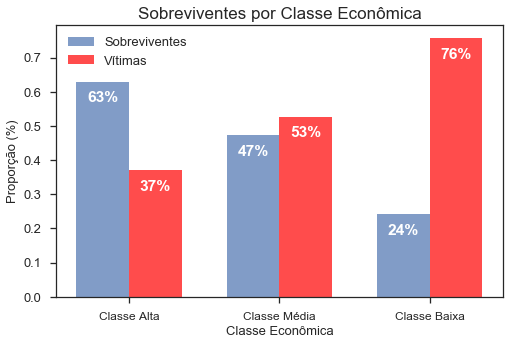

In [135]:
# Investigando Taxa de Sobrevivência por Classe Econômica

# Preparando dados
surv_counts = df.groupby(['Survived', 'Pclass']).count()['Name']
class_total = df.groupby('Pclass').count()['Name']
s_prop = surv_counts[1] / class_total
v_prop = surv_counts[0] / class_total

ind = np.arange(len(s_prop))
width = .35
sns.set_style('ticks')
sns.set_context('talk')

# Criando figs e axes
fig, ax = plt.subplots(figsize=(8, 5))
s_bar = plt.bar(ind, s_prop, width, alpha=.7, label='Sobreviventes')
v_bar = plt.bar(ind+width, v_prop, width, color='r', alpha=.7, label='Vítimas')
plt.ylabel('Proporção (%)', fontsize=13)
plt.xlabel('Classe Econômica', fontsize=13)
plt.title('Sobreviventes por Classe Econômica', fontsize=17)
locations = ind + width / 2
labels = ['Classe Alta', 'Classe Média', 'Classe Baixa']
plt.xticks(locations, labels, fontsize=12)
plt.legend()

# Mostrando porcentagem de dados nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.20*width, p.get_y() + height - 0.06), 
                color='w', weight='bold')
plt.show()

Interpretando as informações obtidas acima, chega-se a conclusão de que passageiros de classe econômica alta possuíam maiores chances de sobrevivência, seguidos da classe média e baixa que, por sua vez, apresentou os maiores índices de vítimas do naufrágio, totalizando 76%. 

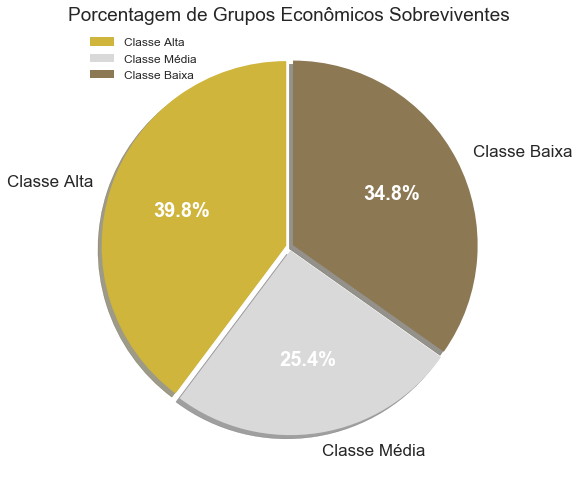

In [136]:
# Distribuição das Classes Econômicas no grupo de Sobreviventes

surv_class = df.groupby(['Survived', 'Pclass']).count()['Name'][1]
surv_class

labels = ['Classe Alta', 'Classe Média', 'Classe Baixa']
colors = ['#CFB53B', '#d9d9d9', '#8C7853']
explode = (0.02, 0.02, 0.02)
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(surv_class, labels=labels, 
                                   startangle=90, shadow=True, explode=explode,
                                  autopct='%1.1f%%', colors=colors)
ax.set_title('Porcentagem de Grupos Econômicos Sobreviventes', fontsize=19)
ax.axis('equal')
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.setp(autotexts, size=20, weight='bold', color='w')
plt.setp(texts, size=17)
plt.show()

Assim como avaliado na análise de sobreviventes por gênero, a quantidade total em cada uma das classes pode interferir no julgamento sobre suas respectivas probabilidades de sobrevivência. Para tal, o gráfico abaixo foca apenas a visão de sobreviventes separados por classe econômica.

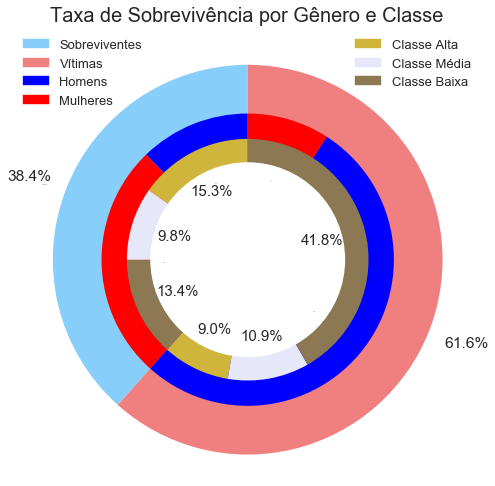

In [137]:
# Plotagem final da taxa de sobreviventes contendo informações de gênero

import matplotlib.patches as mpatches

# Número de sobreviventes e vítimas
total_surv = df.groupby('Survived').count()['Name']
surv_gender = df.groupby(['Sex', 'Survived']).count()['Name']
prop_surv_f = surv_gender['female'] 
import matplotlib.patches as mpatches

# Número de sobreviventes e vítimas
total_surv = df.groupby('Survived').count()['Name']

# Sobreviventes por gênero
surv_gender = df.groupby(['Sex', 'Survived']).count()['Name']
prop_surv_f = surv_gender['female'] 
prop_surv_m = surv_gender['male'] 

# Sobreviventes por classe social
surv_class = df.groupby(['Pclass', 'Survived']).count()['Name']
prop_surv_1 = surv_class[1]
prop_surv_2 = surv_class[2]
prop_surv_3 = surv_class[3]

# Fatia de sobreviventes
labels = ['Sobreviventes', 'Vítimas']
sizes = [total_surv[1], total_surv[0]]

# Fatia de gêneros
labels_gender = ['Masculino', 'Feminino'] * 2
sizes_gender = [prop_surv_m[1], prop_surv_f[1], 
                prop_surv_m[0], prop_surv_f[0]]

# Fatia de classe econômica
labels_class = ['Alta', 'Média', 'Baixa'] * 2
sizes_class = [prop_surv_1[1], prop_surv_2[1], prop_surv_3[1], 
               prop_surv_1[0], prop_surv_2[0], prop_surv_3[0]]

# Definindo cores
colors = ['lightskyblue', 'lightcoral']
colors_gender = ['blue', 'red']
colors_class = ['#CFB53B', '#E6E8FA', '#8C7853']

# Criando plots
fig, ax = plt.subplots(figsize=(7, 7))

wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, startangle=90, radius=1.00,
                                   frame=True, autopct='%1.1f%%', pctdistance=1.20)
wedges_g, texts_g, autotexts_g = plt.pie(sizes_gender, colors=colors_gender, radius=0.75, 
                  autopct='%1.1f%%', pctdistance=0.57, startangle=90)
wedges_c, texts_c, autotexts_c = plt.pie(sizes_class, colors=colors_class, radius=0.62, 
                  autopct='%1.1f%%', pctdistance=0.64, startangle=90)

# Configurando especialidades do gráfico
center_circle = plt.Circle((0,0), 0.50, fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(center_circle)
ax.set_title('Taxa de Sobrevivência por Gênero e Classe', fontsize=20)
ttl = ax.title
ttl.set_position([.5, 1.05])
ax.axis('equal')
plt.legend(fontsize=12, loc='upper left')
legend_f = mpatches.Patch(color='red', label='Mulheres')
legend_m = mpatches.Patch(color='blue', label='Homens')
legend_s = mpatches.Patch(color='lightskyblue', label='Sobreviventes')
legend_v = mpatches.Patch(color='lightcoral', label='Vítimas')
legend_c1 = mpatches.Patch(color='#CFB53B', label='Classe Alta')
legend_c2 = mpatches.Patch(color='#E6E8FA', label='Classe Média')
legend_c3 = mpatches.Patch(color='#8C7853', label='Classe Baixa')

plt.legend(bbox_to_anchor=(0., 0.85, 1., .102), loc=3, 
           ncol=2, mode="expand", borderaxespad=0., 
           handles=[legend_s, legend_v, legend_m, legend_f, legend_c1, legend_c2, legend_c3])

plt.tight_layout()
plt.setp(autotexts_g, size=0)
plt.setp(autotexts_c, size=15)
plt.setp(texts, size=0)
plt.show()

Interpretando as informações obtidas, chega-se a conclusão de que passageiros de classe econômica alta possuíram maiores chances de sobrevivência, seguidos da classe média e baixa que, por sua vez, apresentou os maiores índices de instâncias vítimas do naufrágio (76\%). 

Alguns possíveis fatores que explicariam tal resultado:

* Passageiros de Classe Alta possivelmente tiveram prioridade para evacuação nos botes salva-vidas;
* Passageiros de Classe Alta possivelmente tiveram acesso facilitado durante a evacuação;
* Mesmo após a evacuação, passageiros de Classe Alta possivelmente tiveram melhores condições de proteção ao frio em alto mar;
* Por possivelmente possuírem melhores condições financeiras, os passageiros de Classe Alta poderiam ter habilidades de nado que se fizeram úteis após o naufrágio;

#### Sobreviventes por Faixa Etária

In [138]:
# Analisando propriedades estatísticas do atributo Age
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Para avaliar a influência da idade na taxa de sobrevivência, é necessário realizar um agrupamento nos dados numéricos de acordo com as faixas abaixo:

* Crianças - Passageiros com idade menor que 21 anos;
* Adultos - Passageiros com idade entre 21 e 50 anos;
* Idosos - Passageiros com 50 anos de idade ou mais.

In [139]:
# Agrupando - Definindo ranges
bin_edges = [df['Age'].describe()['min'], 21, 
             55, df['Age'].describe()['max']]

bin_edges

[0.42, 21, 55, 80.0]

In [140]:
# Definindo Labels
bin_names = ['Criança', 'Adulto', 'Idoso']
bin_names

['Criança', 'Adulto', 'Idoso']

In [141]:
# Aplicando .cut()
pd.cut(df['Age'], bin_edges, labels=bin_names)[:15]

PassengerId
1      Adulto
2      Adulto
3      Adulto
4      Adulto
5      Adulto
6      Adulto
7      Adulto
8     Criança
9      Adulto
10    Criança
11    Criança
12      Idoso
13    Criança
14     Adulto
15    Criança
Name: Age, dtype: category
Categories (3, object): [Criança < Adulto < Idoso]

In [142]:
# Verificando alterações
df.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S


In [143]:
# Aparentemente os resultados batem, porém as alterações não foram incluídas no Dataset.

# Criando nova coluna
df['AgeRange'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

In [144]:
# Verificando alterações no Dataset
df.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Adulto
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Adulto
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Adulto
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adulto
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adulto
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,Adulto
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Adulto
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Criança
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Adulto


In [145]:
# Filtrando visualização
df.loc[:, ['Name', 'Survived', 'Age', 'AgeRange']].head(15)

,Name,Survived,Age,AgeRange
PassengerId,,,,
1,"Braund, Mr. Owen Harris",0,22.000000,Adulto
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,Adulto
3,"Heikkinen, Miss. Laina",1,26.000000,Adulto
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,Adulto
5,"Allen, Mr. William Henry",0,35.000000,Adulto
6,"Moran, Mr. James",0,29.699118,Adulto
7,"McCarthy, Mr. Timothy J",0,54.000000,Adulto
8,"Palsson, Master. Gosta Leonard",0,2.000000,Criança
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,Adulto


In [146]:
# Há alguma inconsistência nos dados?
df['AgeRange'].isnull().values.any()

True

Parece que alguns dados não foram classificados corretamente. É preciso verificar em quais linhas este problema ocorreu.

In [147]:
df_age_null = df[df['AgeRange'].isnull()]
df_age_null

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange
PassengerId,,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C,NaN


Então o passageiro de id 804 e idade 0.42 não foi classificado como deveria. Provavelmente algum erro nos parâmetros de `cut()`.

In [148]:
# Classificando manualmente e verificando alterações
df['AgeRange'][804] = 'Criança'

print(f'Há dados nulos na coluna "AgeRange"? {df.isnull().values.any()}')
print(f'Qual a classificação do passageiro 804? {df["AgeRange"][804]}')

Há dados nulos na coluna "AgeRange"? False
Qual a classificação do passageiro 804? Criança


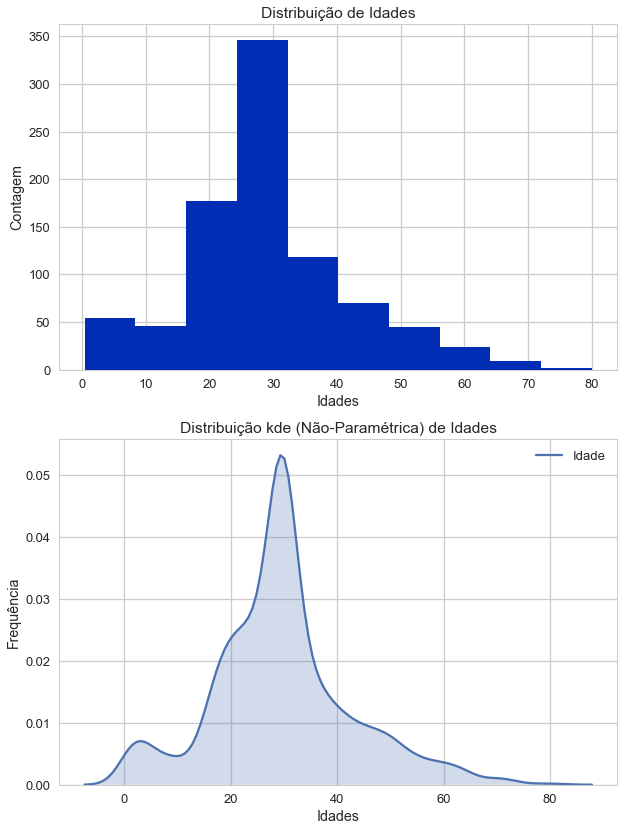

In [149]:
# Plotando distribuição de idades
# Distribuição de Idades
fig, ax = plt.subplots(1, 2, figsize=(10, 14))
sns.set_context('talk')
sns.set_style('whitegrid')
# Primeiro plot = histograma
plt.subplot(211)
sns.distplot(df['Age'], kde=False, bins=10, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3,
                             "alpha": 1, "color": "#002db3"})
plt.title('Distribuição de Idades')
plt.xlabel('Idades')
plt.ylabel('Contagem')
# Segundo plot = kde
plt.subplot(212)
sns.kdeplot(df['Age'], shade=True, label='Idade')
plt.title('Distribuição kde (Não-Paramétrica) de Idades')
plt.xlabel('Idades')
plt.ylabel('Frequência')

plt.show()

In [150]:
# PLotando gráfico

# Agrupando dados por condição após naufrágio e faixa etária
surv_age = df.groupby(['Survived', 'AgeRange']).count()['Name']
surv_age

Survived  AgeRange
0         Criança     117
          Adulto      404
          Idoso        28
1         Criança      87
          Adulto      243
          Idoso        12
Name: Name, dtype: int64

In [151]:
# Contagem total de cada faixa etária
age_total = df.groupby('AgeRange').count()['Name']
age_total

AgeRange
Criança    204
Adulto     647
Idoso       40
Name: Name, dtype: int64

In [152]:
# Proporção de cada faixa etária com relação as condições pós-naufrágio
age_prop = surv_age / age_total
age_prop

Survived  AgeRange
0         Criança     0.573529
          Adulto      0.624420
          Idoso       0.700000
1         Criança     0.426471
          Adulto      0.375580
          Idoso       0.300000
Name: Name, dtype: float64

In [153]:
# Indexando valores
surv_prop = age_prop[1]
vict_prop = age_prop[0]

surv_prop

AgeRange
Criança    0.426471
Adulto     0.375580
Idoso      0.300000
Name: Name, dtype: float64

Após os testes, é possível plotar a análise graficamente.

In [154]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adulto
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adulto
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adulto
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adulto
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adulto


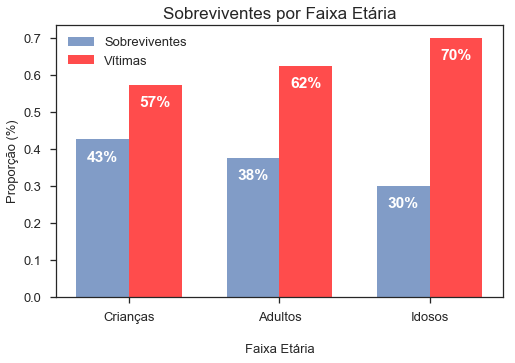

In [155]:
# Investigando Taxa de Sobrevivência por Classe Econômica

# Preparando dados
surv_age = df.groupby(['Survived', 'AgeRange']).count()['Name']
age_total = df.groupby('AgeRange').count()['Name']
age_prop = surv_age / age_total
surv_prop = age_prop[1]
vict_prop = age_prop[0]

ind = np.arange(len(surv_prop))
width = .35
sns.set_style('ticks')
sns.set_context('talk')

# Criando figs e axes
fig, ax = plt.subplots(figsize=(8, 5))
s_bar = plt.bar(ind, surv_prop, width, alpha=.7, label='Sobreviventes')
v_bar = plt.bar(ind+width, vict_prop, width, color='r', alpha=.7, label='Vítimas')
plt.ylabel('Proporção (%)', fontsize=13)
plt.xlabel('Faixa Etária', fontsize=13, labelpad=20)
plt.title('Sobreviventes por Faixa Etária', fontsize=17)
locations = ind + width / 2
labels = ['Crianças', 'Adultos', 'Idosos']
plt.xticks(locations, labels, fontsize=13)
plt.legend()

# Mostrando porcentagem de dados nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.20*width, p.get_y() + height - 0.06), 
                color='w', weight='bold')
plt.show()

O gráfico acima indica que o grupo etário classificado como "Crianças" obteve maiores chances de sobrevivência. Dentre alguns pontos que podem ser destacados com o objetivo de entender tais resultados, encontram-se:

* Prioridade de resgate foi dada às crianças;
* Idosos poderiam ter encontrado dificuldades de sobrevivência dados os imensos obstáculos presentes;
* A baixa resistência física dos Idosos pode ter contribuído com a grande porcentagem de vítimas;

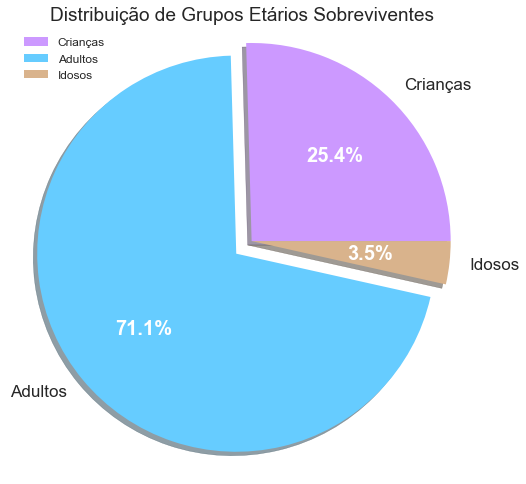

In [156]:
# Distribuição por Sobreviventes

# Sobreviventes por classe social
surv_age = df.groupby(['Survived', 'AgeRange']).count()['Name'][1]

labels = ['Crianças', 'Adultos', 'Idosos']
colors = ['#cc99ff', '#66ccff', '#d9b38c']
explode = (0.0, 0.1, 0.0)
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(surv_age, labels=labels, 
                                   startangle=0, shadow=True, explode=explode,
                                  autopct='%1.1f%%', colors=colors)
ax.set_title('Distribuição de Grupos Etários Sobreviventes', fontsize=19)
ax.axis('equal')
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.setp(autotexts, size=20, weight='bold', color='w')
plt.setp(texts, size=17)
plt.show()

In [157]:
# Salvando novo Dataset
df.to_csv('C:/Users/thiagoPanini/Downloads/datasets/titanic-data-6-edited-2.csv')

In [158]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/titanic-data-6-edited-2.csv')
df.set_index('PassengerId', inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adulto
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adulto
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adulto
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adulto
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adulto


#### Sobreviventes por Porto de Embarque

Função para retornar dados estatísticos relevantes sobre passageiros de acordo com o porto de embarque

In [159]:
def stats_bay(bay):
    bay = bay.strip().upper()
    
    contagem = df.groupby('Embarked').count()['Name']
    medias = df.groupby('Embarked').mean()
    p_class_emb = df.groupby(['Embarked', 'Pclass']).count()['Name']
    prop_class = 100 *  p_class_emb[bay] / contagem[bay]
    gender_emb = df.groupby(['Embarked', 'Sex']).count()['Name']
    prop_gender = 100 * gender_emb[bay] / contagem[bay]
    agerange_emb = df.groupby(['Embarked', 'AgeRange']).count()['Name']
    prop_agerange = 100 * agerange_emb[bay] / contagem[bay]
    surv_emb = df.groupby(['Embarked', 'Survived']).count()['Name']
    prop_surv = 100 * surv_emb[bay] / contagem[bay]
    
    if bay == 'C':
        bay_name = 'Cherbourg'
    elif bay == 'S':
        bay_name = 'Southampton'
    else:
        bay_name = 'Queenstown'

    print(f'- - - DADOS DE {bay_name.upper()} - - -')
    print(f'Total de passageiros com embarque em {bay_name}: {contagem[bay]} pessoas.')
    print(f'Idade média dos passageiros de {bay_name}: {medias["Age"][bay]:.2f} anos.')
    print(f'Ticket médio dos passageiros de {bay_name}: ${medias["Fare"][bay]:.2f}')
    print('- - - CLASSE ECONÔMICA - - -')
    print(f'Porcentagem de Classe Alta que embarcaram em {bay_name}: {prop_class[1]:.2f}%')
    print(f'Porcentagem de Classe Média que embarcaram em {bay_name}: {prop_class[2]:.2f}%')
    print(f'Porcentagem de Classe Baixa que embarcaram em {bay_name}: {prop_class[3]:.2f}%')
    print('- - - GÊNERO - - -')
    print(f'Porcetagem de Homens que embarcaram em {bay_name}: {prop_gender["male"]:.2f}%')
    print(f'Porcetagem de Mulheres que embarcaram em {bay_name}: {prop_gender["female"]:.2f}%')
    print('- - - FAIXA ETÁRIA - - -')
    print(f'Porcentagem de Crianças que embarcaram em {bay_name}: {prop_agerange["Criança"]:.2f}%')
    print(f'Porcentagem de Adultos que embarcaram em {bay_name}: {prop_agerange["Adulto"]:.2f}%')
    print(f'Porcentagem de Idosos que embarcaram em {bay_name}: {prop_agerange["Idoso"]:.2f}%')
    print('- - - PROBABILIDADE DE SOBREVIVÊNCIA - - -')
    print(f'Probabilidade de sobrevivência para embarcantes em {bay_name}: {prop_surv[1]:.2f}%')

In [163]:
stats_bay('c')

- - - DADOS DE CHERBOURG - - -
Total de passageiros com embarque em Cherbourg: 170 pessoas.
Idade média dos passageiros de Cherbourg: 30.79 anos.
Ticket médio dos passageiros de Cherbourg: $60.19
- - - CLASSE ECONÔMICA - - -
Porcentagem de Classe Alta que embarcaram em Cherbourg: 51.18%
Porcentagem de Classe Média que embarcaram em Cherbourg: 10.00%
Porcentagem de Classe Baixa que embarcaram em Cherbourg: 38.82%
- - - GÊNERO - - -
Porcetagem de Homens que embarcaram em Cherbourg: 55.88%
Porcetagem de Mulheres que embarcaram em Cherbourg: 44.12%
- - - FAIXA ETÁRIA - - -
Porcentagem de Crianças que embarcaram em Cherbourg: 19.41%
Porcentagem de Adultos que embarcaram em Cherbourg: 73.53%
Porcentagem de Idosos que embarcaram em Cherbourg: 7.06%
- - - PROBABILIDADE DE SOBREVIVÊNCIA - - -
Probabilidade de sobrevivência para embarcantes em Cherbourg: 55.88%


Apesar da massiva quantidade de dados na análise acima, seria interessante visualizar apenas a plotagem gráfica de alguns atributos.

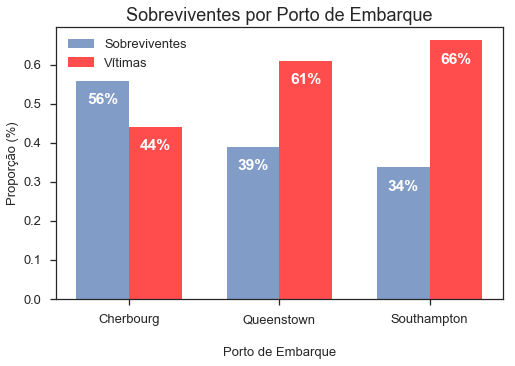

In [164]:
# Preparando dados
surv_emb = df.groupby(['Survived', 'Embarked']).count()['Name']
emb_total = df.groupby('Embarked').count()['Name']
emb_prop = surv_emb / emb_total
surv_prop = emb_prop[1]
vict_prop = emb_prop[0]

ind = np.arange(len(emb_prop[1]))
width = .35
sns.set_style('ticks')
sns.set_context('talk')

# Criando figs e axes
fig, ax = plt.subplots(figsize=(8, 5))
s_bar = plt.bar(ind, surv_prop, width, alpha=.7, label='Sobreviventes')
v_bar = plt.bar(ind+width, vict_prop, width, color='r', alpha=.7, label='Vítimas')
plt.ylabel('Proporção (%)', fontsize=13)
plt.xlabel('Porto de Embarque', fontsize=13, labelpad=20)
plt.title('Sobreviventes por Porto de Embarque', fontsize=18)
locations = ind + width / 2
labels = ['Cherbourg', 'Queenstown', 'Southampton']
plt.xticks(locations, labels, fontsize=13)
plt.legend()

# Mostrando porcentagem de dados nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.20*width, p.get_y() + height - 0.06), 
                color='w', weight='bold')
plt.show()

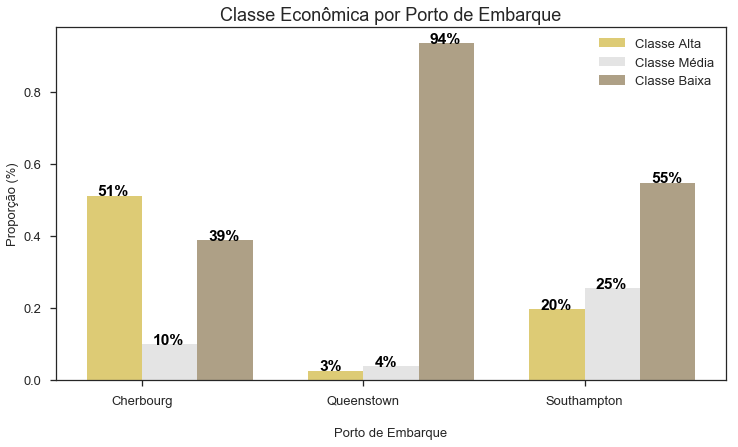

In [165]:
# Agrupamento de Classe Econômica por Porto de Embarque
pclass_emb = df.groupby(['Pclass', 'Embarked']).count()['Name']

# Contagem total por Porto
emb_total = df.groupby('Embarked').count()['Name']

# Proporção de Classe Econômica por Porto
emb_prop = pclass_emb / emb_total
high_class = emb_prop[1]
medium_class = emb_prop[2]
low_class = emb_prop[3]

# Configurando barras e figure
ind = np.arange(len(high_class))
width = .25
sns.set_style('ticks')
sns.set_context('talk')

# Criando figs e axes
fig, ax = plt.subplots(figsize=(12, 6.5))
high_bar = plt.bar(ind, high_class, width, color='#CFB53B', alpha=.7, label='Classe Alta')
medium_bar = plt.bar(ind+width, medium_class, width, color='#d9d9d9', alpha=.7, label='Classe Média')
low_bar = plt.bar(ind+2*width, low_class, width, color='#8C7853', alpha=.7, label='Classe Baixa')
plt.ylabel('Proporção (%)', fontsize=13)
plt.xlabel('Porto de Embarque', fontsize=13, labelpad=20)
plt.title('Classe Econômica por Porto de Embarque', fontsize=18)
locations = ind + width / 2
labels = ['Cherbourg', 'Queenstown', 'Southampton']
plt.xticks(locations, labels, fontsize=13)
plt.legend()

# Mostrando porcentagem de dados nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.20*width, p.get_y() + height + 0.00), 
                color='black', weight='bold')

plt.show()

Avaliando os resultados obtidos com a função acima definida, é possível perceber, logo de cara, uma maior probabilidade de sobrevivência entre os passageiros que embarcaram em Cherbourg. Na ciência de tal informação, nota-se também que há diferenciações importantes em outros atributos, como por exemplo, a grande concentração de passageiros de Classe Alta que embarcaram em Cherbourg. Ademais, a menor porcentagem de passageiros de Classe Baixa embarcaram neste mesmo porto.

Como esperado as conclusões reteiradas da análise acima indicaram que o Ticket Médio pago por passageiros que embarcaram em Cherbourg é consideravalmente maior, o que confirma o fato de passageiros de Classe Alta terem pago um valor maior no Ticket.

Alguns pontos que explicariam os resultados obtidos:

* Maior presença de passageiros de Classe Alta em Cherbourg;
* Passageiros de Classe Alta provavelmente teriam condições privilegiadas no navio, como localização dos quartos, acesso às rotas de emergência ou à equipamentos de segurança, entre outros;
* Pouca porcentagem de Jovens e Crianças que embarcaram em Queenstown pode ter contribuído para a possível baixa prioridade de resgate;
* Grande presença de passageiros de Classe Baixa em Queenstown influenciaram diretamente na grande proporção de vítimas.

### Conclusão

A análise de dados permite retirar informações de onde jamais fosse possível imaginar tal feito. O naufrågio do Titanic se mostrou um excelente instrumento de análise para evidenciar, na prática, uma pequena parcela do poder oferecido pelo ferramental da ciência de dados
 
Através da união entre conceitos estatísticos, probabilísticos, computacionais e de entendimento do caso estudado, foi possível concluir que as maiores chances de sobrevivência estavam em nichos específicos de passageiros que contemplavam, por exemplo, o genêro feminino, a classe econômica alta, as menores faixas etárias e até mesmo o porto de embarque.
 
Em cada um dos respectivos tópicos, foi possível discorrer sobre os principais motivos que poderiam servir como justificativas para os resultados obtidos. O levantamento de hipóteses, como a possível dificuldade encontrada por idosos ou a possível prioridade à passageiros de classes econômicas mais altas, por exemplo, somente foi possível com uma investigação direcionada na base de dados oferecida, aplicando conceitos de limpeza, preparação, transformação e análise.

As plotagens gráficas e tabelas presentes nesse relatório foram desenvolvidas visando a simplicidade e coerência dos fatos apresentados, sempre procurando transmitir o impacto adequado causado pelo tratamento puro dos dados, sendo este realizado nos bastidores do código.

Por fim, e nao menos importante, as conclusões obtidas com relação as chances de sobrevivência em cada um dos tópicos estudados ocasionaram não somente um maior entendimento sobre as ferramentas de analise de dados, mas tambem contribuíram para um enriquecimento histórico-pessoal, uma vez que os insights obtidos com a presente análise poderão ser comunicados à qualquer pessoa que já tenha ouvido falar sobre o navio Titanic.


As plotagens gráficas e tabelas presentes nesse relatório foram desenvolvidas visando a simplicidade e coerência dos fatos apresentados, sempre procurando transmitir o impacto adequado causado pelo tratamento puro dos dados realizado nos bastidores do código. Com tais ferramentas foi possível concluir:

* Gênero: 74\% das mulheres sobreviverem e, do outro lado, apenas 19\% dos homens;
* Classe Econômica: tem-se, na Classe Alta, 63\% de sobreviventes contra 47\% e 24\% nas classes Média e Baixa, respectivamente;
* Faixa Etária: Crianças (até 21 anos) com 43\% de sobrevivência, Adultos (de 21 a 50 anos) com 38\% e, por fim, Idosos (acima de 50 anos) com 30\% de sobrevivência;
* Porto de Embarque: Dos passageiros que embarcaram em Cherbourg, 56\% sobreviveram contra 39\% em Queenstown e 34\% em Southampton;

Alguns fatores que explicam tais índices giram em torno da prioridade de resgate dada a grupos específicos, como passageiros de Classe Alta, Mulheres e Crianças, por exemplo, ou até mesmo a localizações privilegiadas dentro do navio.


### Limitações

Durante a execução do projeto, foram enfrentados diversos desafios e superados vários obstáculos. O primeiro ponto a ser destacado tem relação com o grande número de dados faltantes em certas colunas do Dataset, como Age, Cabin e Embarked. Este foi um ponto crucial pois fez-se necessária uma minuciosa análise nas consequências das possíveis ações a serem tomadas.

Com relação a coluna Cabin, foi decidido pela sua exclusão, visto que as hipóteses levantadas, para o escopo deste trabalho, não a levavam em consideração como instrumento influenciador na taxa de sobreviventes do naufrágio Titanic. Já para a coluna Age, por sua vez, decidiu-se pelo preenchimento dos valores faltantes através da média do atributo. Em Embarked, foi realizada uma investigação levando em conta as características principais dos passageiros com este dado faltante. 

As plotagens gráficas também representaram grandes desafios. Algumas apresentam certa complexididade e só foram possíveis através de árduas pesquisas e testes afim de posicionar e apresentar os elementos da melhor forma possível.

Para uma análise coerente do atributo Age, decidiu-se pelo agrupamento dos dados em faixas etárias representando, assim, grupos descritos por Crianças, Adultos e Idosos. A criação de uma nova coluna no Dataset se fez necessária para o armazenamento destes dados.